In [25]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import sklearn.grid_search
import sklearn.feature_extraction
import sklearn.feature_extraction.text
import numpy as np
import pickle

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [2]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr, Xte, ytr, yte = get_training_test_set(rawtable, make_features=make_features5, 
                                               categorize_rating=categorize_rating5)

#How do the important features affect rating?

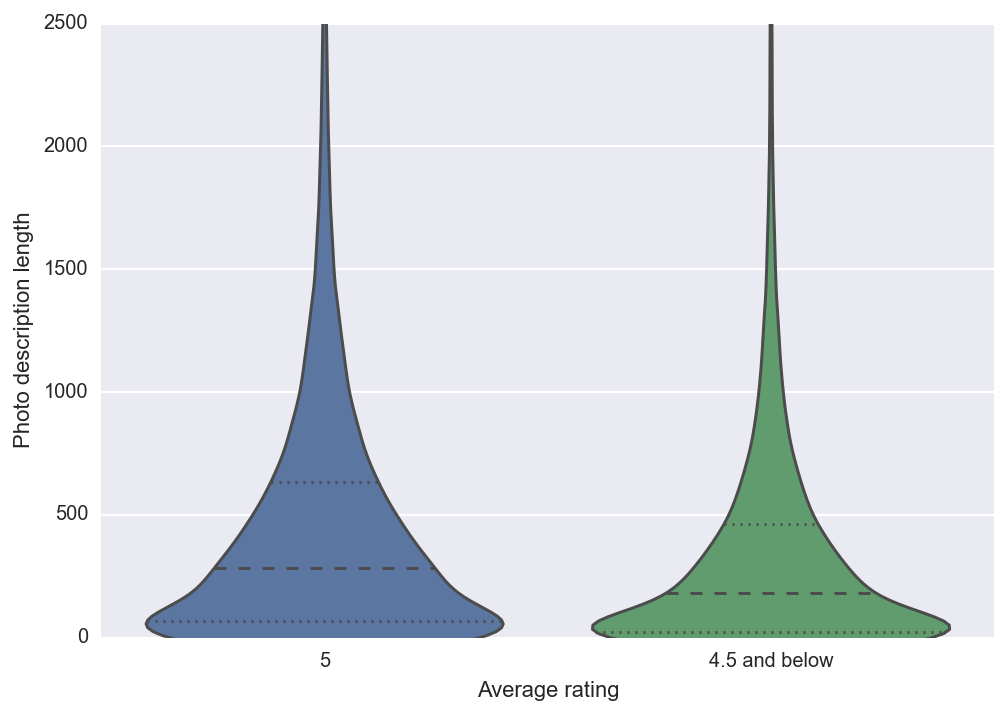

In [13]:
sns.violinplot(Xtr.photosCommentsLength, groupby=ytr, cut=10, names=['5', '4.5 and below'], gridsize=1000)
plt.ylim([0, 2500])
plt.xlabel('Average rating')
plt.ylabel('Photo description length')

##Update time is supposed to be a useful feature. Maybe for outliers?

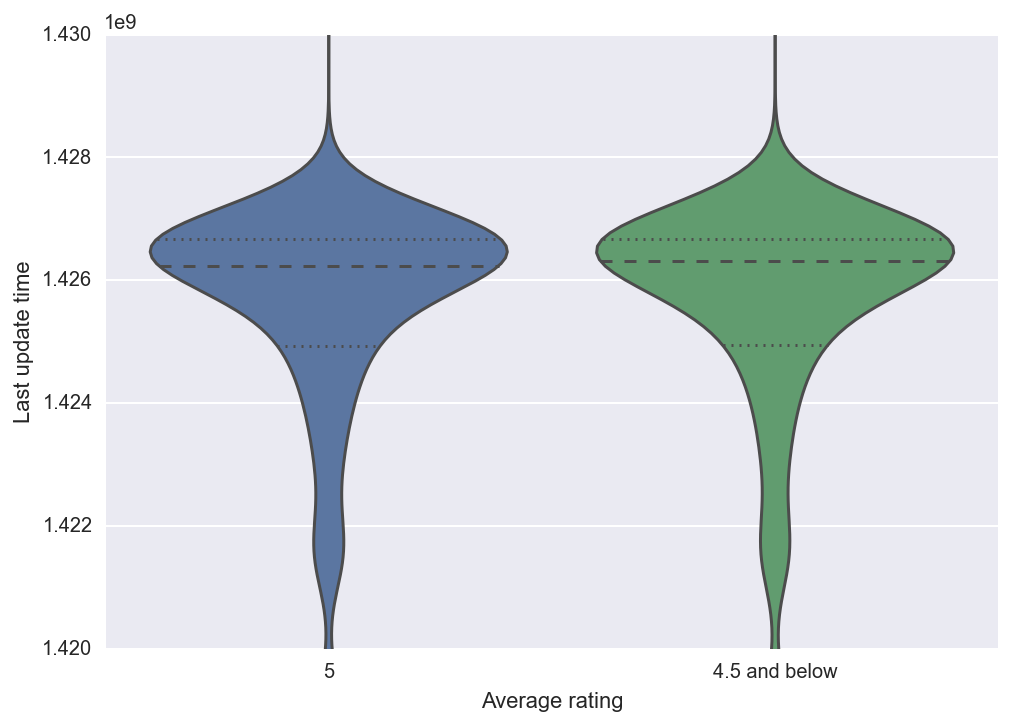

In [12]:
sns.violinplot(Xtr.lastUpdatedAt, groupby=ytr, cut=10, names=['5', '4.5 and below'], gridsize=1000)
plt.ylim(np.array([1.42, 1.43])*1e9)
plt.xlabel('Average rating')
plt.ylabel('Last update time')

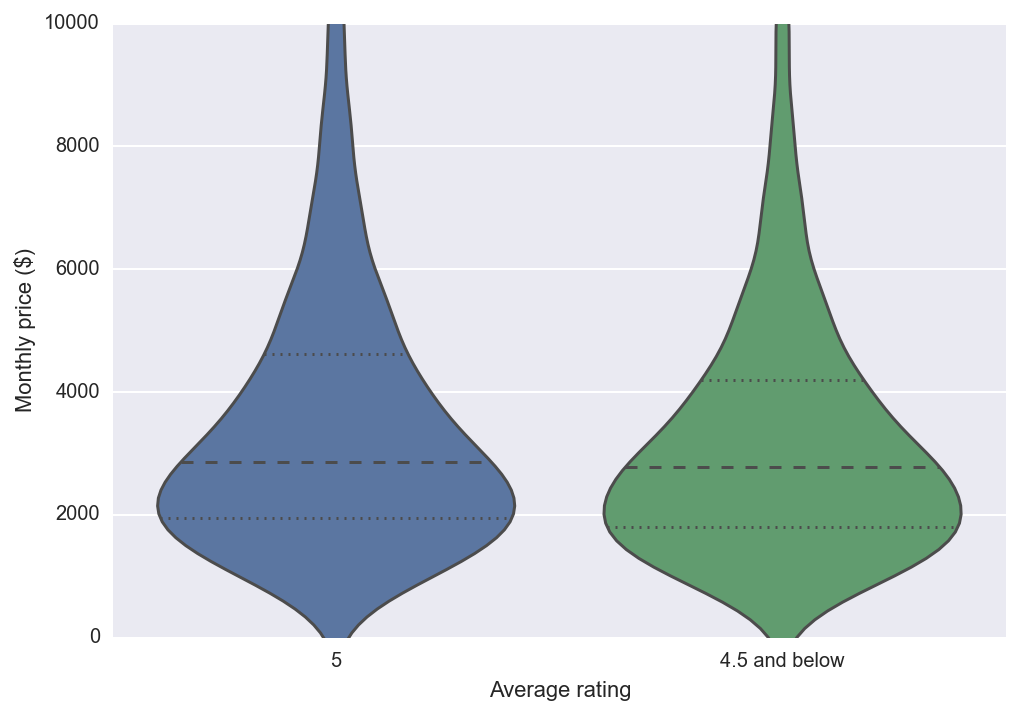

In [17]:
sns.violinplot(Xtr.monthly, groupby=ytr, cut=3, names=['5', '4.5 and below'], gridsize=1000)
plt.ylim(np.array([0, 10000]))
plt.xlabel('Average rating')
plt.ylabel('Monthly price ($)')

In [24]:
X_unrated = make_features5(rawtable[np.isnan(rawtable.rating)])

In [27]:
clf = pickle.load(open("../pipe2.pkl", "rb"))

#Unrated listings are much more likely to be predicted to be 5s. Why? Different feature distribution?

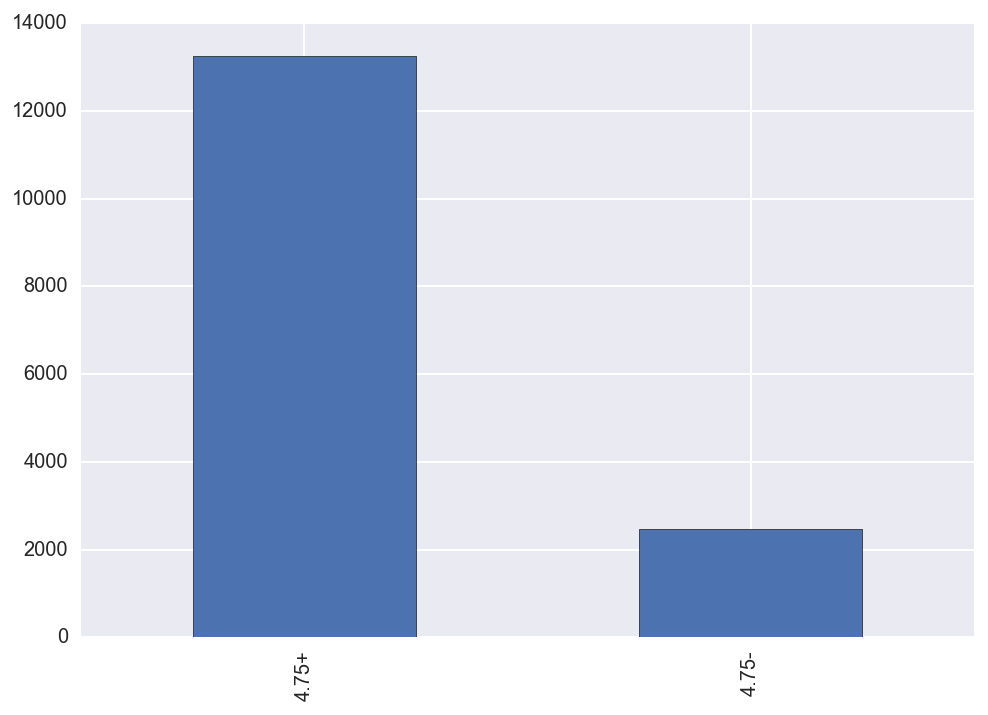

In [31]:
pd.Series(clf.predict(X_unrated)).value_counts().plot(kind='bar')

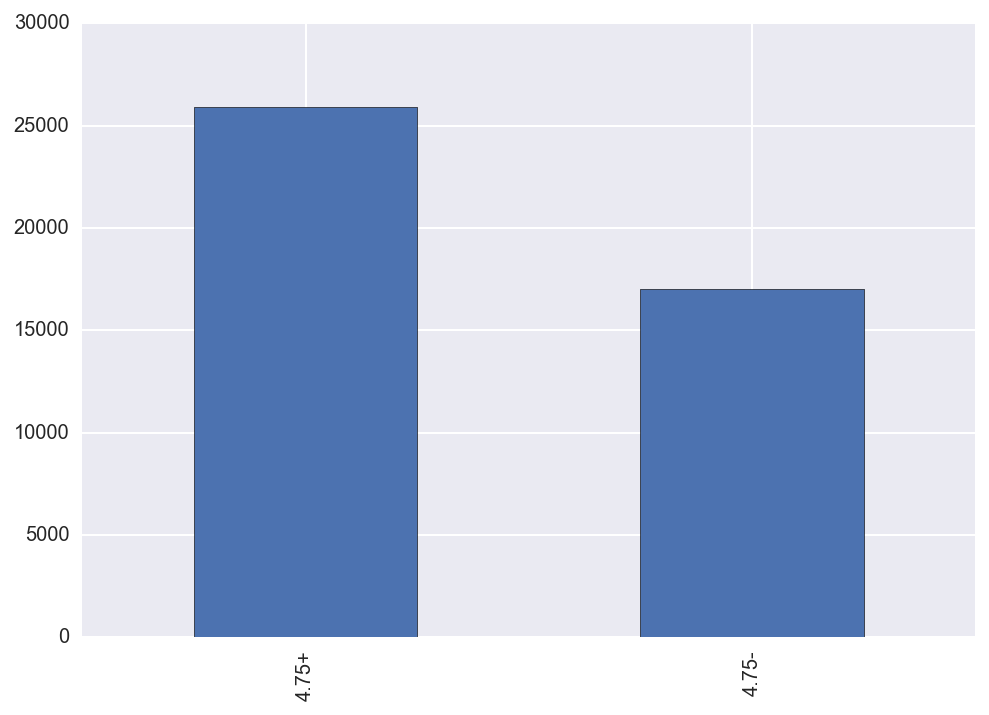

In [32]:
pd.Series(clf.predict(Xtr)).value_counts().plot(kind='bar')